In [12]:
import sympy as sp
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

lam_val = 0.5  # Replace with your known value of lambda
gamma_0_val = 2 # Replace with your known value of gamma_0

# Define the symbols
t, lam, gamma_0 = sp.symbols('t lambda gamma_0')

# Define the symbolic expression for l
l = sp.sqrt(lam**2 - 2*gamma_0*lam)

# Define the symbolic expression for G(t)
G_t = sp.exp(-lam*t/2) * (sp.cosh(l*t/2) + (lam/l)*sp.sinh(l*t/2))

# Ensure complex parts are expanded correctly

# Substitute the known values
G_t_subs = G_t.subs({lam: lam_val, gamma_0: gamma_0_val})

# Create a numerical function for G(t)
G_t_num = sp.lambdify(t, G_t_subs, 'numpy')

def G(lam,gamma_0):

    t = sp.symbols('t')
    l = sp.sqrt(lam**2 - 2*gamma_0*lam)
    G_t = sp.exp(-lam*t/2) * (sp.cosh(l*t/2) + (lam/l)*sp.sinh(l*t/2))
    return G_t

Derivative of G(t):

<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:27: SyntaxWarning: invalid escape sequence '\g'
C:\Users\karak\AppData\Local\Temp\ipykernel_9972\2514558314.py:27: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\karak\AppData\Local\Temp\ipykernel_9972\2514558314.py:27: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


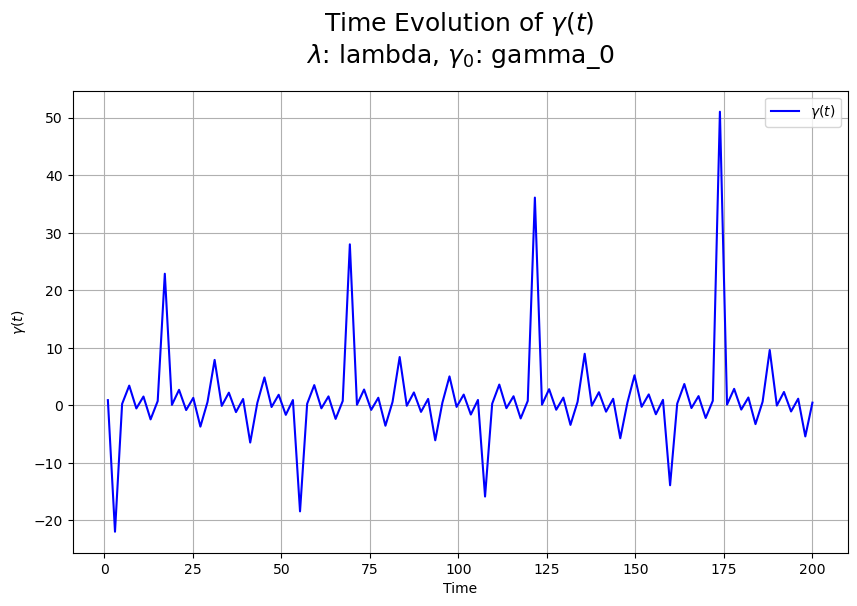

In [13]:
G_t = G(lam_val,gamma_0_val)

G_d = sp.Derivative(G_t,t)
G_d = G_d.doit()
#G_d = sp.simplify(G_d)
Expr = -2*(G_d/G_t)
Expr = sp.simplify(Expr)

# Create a numerical function for G(t)

Expr_num = sp.lambdify(t, Expr, 'numpy')

#expr_npfloat = float(Expr.evalf())

Expr_num(10)

time = np.linspace(1, 200, 100)  # Adjust time range as needed


gam_vals = [Expr_num(t) for t in time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
plt.xlabel('Time')
plt.ylabel(r'$\gamma(t)$')
plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Define the initial state psi0 and the density matrix rho
ket0 = sp.Matrix([[1], [0]])
ket1 = sp.Matrix([[0], [1]])

psi0 = (ket0 + ket1) / sp.sqrt(2)

rho = psi0 * psi0.H

# Density state with respect to time
def rho_t(rho,G_t):

    rho_00 = (1-G_t**2)*rho[1,1] + rho[0,0]
    rho_01 = rho[0,1]*G_t #I've to take conjugate Here! 
    rho_01 = rho[0,1]*sp.conjugate(G_t)
    rho_10 = rho[1,0]*G_t
    rho_11 = rho[1,1]*G_t**2

    rho_1 = rho
    rho_1[0,0] = sp.simplify(rho_00)
    rho_1[0,1] = sp.simplify(rho_01)
    rho_1[1,0] = sp.simplify(rho_10)
    rho_1[1,1] = sp.simplify(rho_11)

    return sp.simplify(rho_1)


# Define the expectation functions
def expec_x(rho, G_t):
    fuc = rho[1,0] * G_t
    return 2 * sp.re(fuc)

def expec_y(rho, G_t):
    fuc = rho[1,0] * G_t
    return -2 * sp.im(fuc)

def expec_z(rho,G_t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G_t**2)
    return fuc

# Calculate the expectation values
expec_x_val = expec_x(rho, G_t)
expec_y_val = expec_y(rho, G_t)
expec_z_val = expec_z(rho, G_t)


# Print the symbolic representations
print("rho:")
rho
print("\nG(t):")
G_t
print("\nExpectation value expec_x:")
expec_x_val

print("\nExpectation value expec_y:")
expec_y_val

#rho_t(rho,G_t)

rho


rho:

G(t):

Expectation value expec_x:

Expectation value expec_y:


Matrix([
[1/2, 1/2],
[1/2, 1/2]])

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\g'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\g'
C:\Users\karak\AppData\Local\Temp\ipykernel_9972\345985779.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam_val}, $\gamma_0$: {gamma_0_val}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
C:\Users\karak\AppData\Local\Temp\ipykernel_9972\345985779.py:39: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam_val}, $\gamma_0$: {gamma_0_val}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')


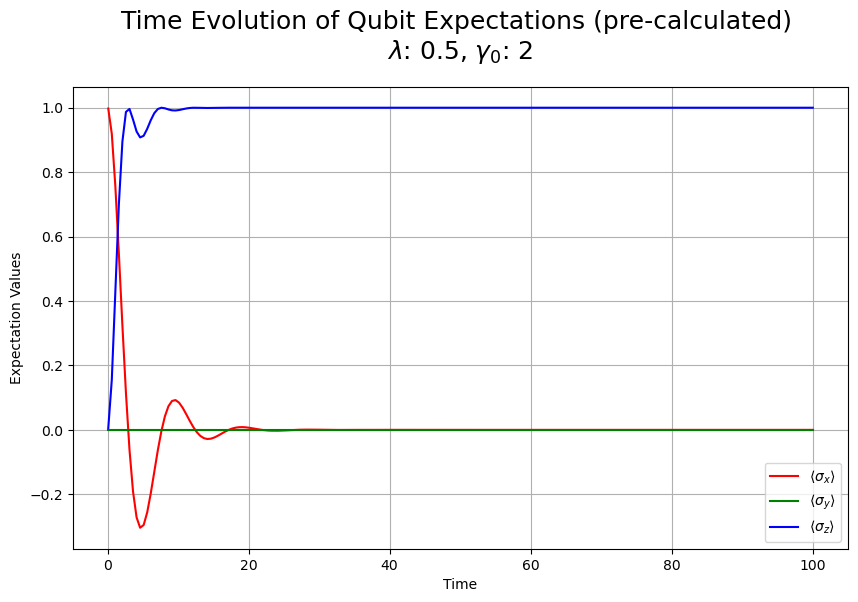

In [15]:
# Time array
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0.1, 100, 200)

# Substitute numerical values into the expression
lam_val = 0.5
gamma_0_val = 2


# Create a numerical function for G(t) using sympy lambdify
G_t_num = sp.lambdify(t, G_t.subs({lam: lam_val, gamma_0: gamma_0_val}), 'numpy')


expec_x_vals = [expec_x(rho, G_t_num(t)) for t in time]
expec_y_vals = [expec_y(rho, G_t_num(t)) for t in time]
expec_z_vals = [expec_z(rho, G_t_num(t)) for t in time]

# Substitute the values
# G_t_numeric = G_t.subs({lam: lam_value, gamma_0: gamma_0_value, t: t_value})

# # Evaluate the expression numerically
# G_t_evaluated = G_t_numeric.evalf()


# # Calculate expectation values
# expec_x_vals = [expec_x(rho, G_t) for t in time]
# expec_y_vals = [expec_y(rho, G_t) for t in time]
# expec_z_vals = [expec_z(rho, G_t) for t in time]

# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam_val}, $\gamma_0$: {gamma_0_val}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
plt.legend()
plt.grid(True)
plt.show()

#from sympy import lambdify


<>:67: SyntaxWarning: invalid escape sequence '\l'
<>:67: SyntaxWarning: invalid escape sequence '\l'
C:\Users\karak\AppData\Local\Temp\ipykernel_9972\544183993.py:67: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations \n$\lambda$: 0.1, $\gamma_0$: 0.5", fontsize=18, pad=20)


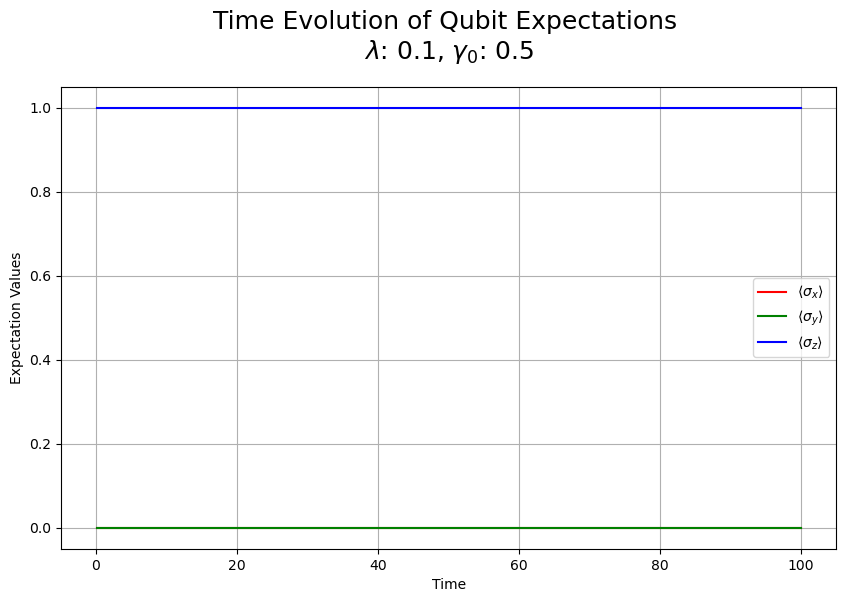

In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
t, lam, gamma_0 = sp.symbols('t lam gamma_0', real=True)
rho = sp.MatrixSymbol('rho', 2, 2)

# Define G_t
l = sp.sqrt(lam**2 - 2*gamma_0*lam)
G_t = sp.exp(-lam*t/2) * (sp.cosh(l*t/2) + (lam/l)*sp.sinh(l*t/2))

# Define Pauli matrices
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])

# Function to compute rho_t
def rho_t(rho, G_t):
    rho_00 = (1 - G_t**2) * rho[1, 1] + rho[0, 0]
    rho_01 = rho[0, 1] * sp.conjugate(G_t)
    rho_10 = rho[1, 0] * G_t
    rho_11 = rho[1, 1] * G_t**2
    
    rho_1 = sp.Matrix([[rho_00, rho_01], [rho_10, rho_11]])
    
    return sp.simplify(rho_1)

# Function to compute expectation value
def expectation_value(rho, sigma):
    return sp.trace(rho * sigma)

# Initial density matrix
rho_init = sp.Matrix([[1, 0], [0, 0]])  # Example initial state

# Create a numerical function for G(t) using sympy lambdify
G_t_num = sp.lambdify(t, G_t.subs({lam: 0.1, gamma_0: 0.5}), 'numpy')

# Define numerical functions for expectation values
def expec_x(rho_init, G_t_val):
    rho_t_val = rho_t(rho_init, G_t_val)
    return expectation_value(rho_t_val, sigma_x).evalf()

def expec_y(rho_init, G_t_val):
    rho_t_val = rho_t(rho_init, G_t_val)
    return expectation_value(rho_t_val, sigma_y).evalf()

def expec_z(rho_init, G_t_val):
    rho_t_val = rho_t(rho_init, G_t_val)
    return expectation_value(rho_t_val, sigma_z).evalf()

# Time array
time = np.linspace(0.1, 100, 200)

# Calculate expectation values
expec_x_vals = [expec_x(rho_init, G_t_num(t_val)) for t_val in time]
expec_y_vals = [expec_y(rho_init, G_t_num(t_val)) for t_val in time]
expec_z_vals = [expec_z(rho_init, G_t_num(t_val)) for t_val in time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations \n$\lambda$: 0.1, $\gamma_0$: 0.5", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()


Construct density state using Master Equation

In [17]:
#import cmath
# Define Operators 

# Define the basis states |0> and |1>
ket0 = sp.Matrix([[1], [0]])
ket1 = sp.Matrix([[0], [1]])

# Define the raising operator σ+
sigma_plus = ket1 * ket0.H
print("σ+ operator:")
print(sigma_plus)

# Define the lowering operator σ-
sigma_minus = ket0 * ket1.H
print("σ- operator:")
print(sigma_minus)

# Define s(t) and gamma(t):
s = sp.im(Expr)

gamma = sp.re(Expr)

# Define Commutative/Anticommutative Operation

def Commu(A, B):
    #A = sp.MatrixSymbol('A', 2, 2)
    #B = sp.MatrixSymbol('B', 2, 2)
    return A*B - B*A    

def Anticommu(A, B):
    #A = sp.MatrixSymbol('A', 2, 2)
    #B = sp.MatrixSymbol('B', 2, 2)
    return A*B + B*A    

Commu(sigma_plus,sigma_minus)

# Define derivative of rho_s(t)
def derivative_rho(rho):
    expression_1 = -1j*(s/2)*Commu(sigma_plus*sigma_minus,rho)
    expression_2 = gamma*(sigma_minus*rho*sigma_plus - 1/2*Anticommu(sigma_plus*sigma_minus,rho))
    return sp.simplify(expression_1 + expression_2)

diff_rho = derivative_rho(rho)
#diff_rho_t

σ+ operator:
Matrix([[0, 0], [1, 0]])
σ- operator:
Matrix([[0, 1], [0, 0]])


Integration of rho

In [18]:

rho_t = sp.integrate(diff_rho,(t,0,t))


rho_t = rho_t.doit()



TypeError: Mix of Matrix and Scalar symbols

Assign values to rho_t



In [ ]:
# Create a numerical function for G(t) using sympy lambdify
lam_val = 10
gamma_0_val = 0.5
t_val = 20
#diff_rho_t = sp.lambdify(t, diff_rho.subs({lam: lam_val, gamma_0: gamma_0_val}), 'numpy')
diff_rho_t = rho_t.subs({lam: lam_val, gamma_0: gamma_0_val,t: t_val}) #, t: t_value

# rho_t = sp.integrate(diff_rho_t,t)


# rho_t = rho_t.doit()
# rho_t

diff_rho_t.doit()

Matrix([
[  0.5*Integral(sinh(4.74341649025257*t)/(1.0*sinh(4.74341649025257*t) + 0.948683298050514*cosh(4.74341649025257*t)), (t, 0, 20)), -0.25*Integral(sinh(4.74341649025257*t)/(1.0*sinh(4.74341649025257*t) + 0.948683298050514*cosh(4.74341649025257*t)), (t, 0, 20))],
[-0.25*Integral(sinh(4.74341649025257*t)/(1.0*sinh(4.74341649025257*t) + 0.948683298050514*cosh(4.74341649025257*t)), (t, 0, 20)),  -0.5*Integral(sinh(4.74341649025257*t)/(1.0*sinh(4.74341649025257*t) + 0.948683298050514*cosh(4.74341649025257*t)), (t, 0, 20))]])